In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalog = pd.read_csv("D:\Yihe\Yihe\SOULTZ_1993\SSFS 1993 10k.csv")

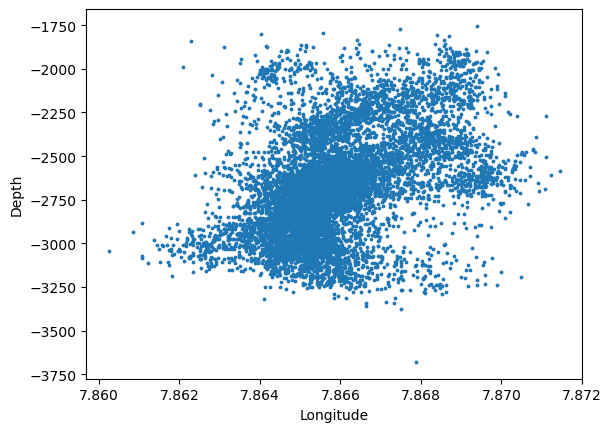

In [3]:
plt.scatter(catalog["Long"],catalog["Elevation"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Depth")
plt.show()

In [4]:
shiftb=[0,0,0]
shift=[0,0,0]
shifta=[0,0,0]
flag=[False,False]
for i in range(len(catalog["Time"])):
    if catalog["Time"][i]>11.05 and flag[0]==False:
        shift[0]=i-1
        shiftb[2]=i-1
        flag[0]=True
        
    if catalog["Time"][i]>11.29 and flag[1]==False:
        shift[2]=i-1
        shifta[0]=i-1
        flag[1]=True
        
shiftb[0]=shift[2]-300
shifta[2]=shift[0]+300
befM = catalog["Mw"][shiftb[0]:shiftb[2]]
durM = catalog["Mw"][shift[0]:shift[2]]
aftM = catalog["Mw"][shifta[0]:shifta[2]]
avgb = np.mean(befM)
avgd = np.mean(durM)
avga = np.mean(aftM)
medb = np.median(befM)
medd = np.median(durM)
meda = np.median(aftM)
print(avgb,avgd,avga)
print(medb,medd,meda)
print(np.mean([1.56,1.48]))
print(1.52-0.68)

MwEdit = np.array(catalog["Mw"])
for i in range(shift[0],shift[2]+1):
    if MwEdit[i]>-1.5:
        MwEdit[i]-=0.84

-1.5164634146341465 -0.6952752293577982 -1.3869512195121951
-1.56 -0.68 -1.48
1.52
0.84


In [25]:
MwE2 =[]
MwEInj=[]
TE2=[]
TEInj=[]
dstE2=[]
dstInj=[]
for i in range(len(catalog["Mw"])):
    if catalog['Time'][i]<11.06 or catalog['Time'][i]>11.287:
        MwE2.append(catalog['Mw'][i])
        TE2.append(catalog['Time'][i])
        dstE2.append(dist[i])
        if catalog['Time'][i] < 15.13360903:
            MwEInj.append(catalog['Mw'][i])
            TEInj.append(catalog['Time'][i])
            dstInj.append(dist[i])
 # MwEInj, TEInj, dstInj

In [4]:
injRt = pd.read_csv("D:\Yihe\Yihe\SOULTZ_1993\Injection Rate.csv")
print(injRt['Time da2'][0])

injSt = injRt['Time da2'][0]
injEnd = 15.13360903- injSt
print(injEnd)

dt = np.array(catalog['Time'].copy())-injSt
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['Mw'], catalog['X'], catalog['Y'], catalog['Z'])
    if injSt-injSt <= d <= injEnd and (d<(11.06-injSt) or d>(11.287-injSt))
])
print(len(magF),len(dt))

-1.198290972
16.331900002
10080 10743


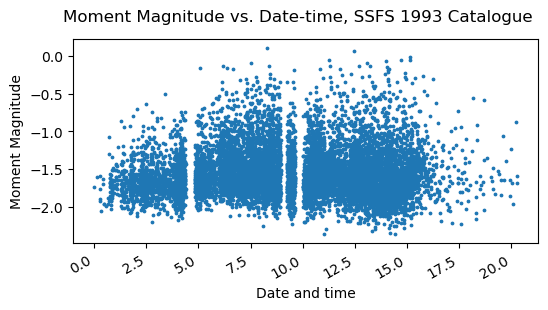

In [5]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(catalog["Time"],MwEdit,s=3)
figure.suptitle("Moment Magnitude vs. Date-time, SSFS 1993 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
figure.autofmt_xdate()
plt.show()

In [6]:
print(len(catalog["Time"]))

10743


In [5]:
#create reference 0 distance based of median of first 10 event locations
import statistics
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

56.5 -126.0 2943.0


In [6]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

[]

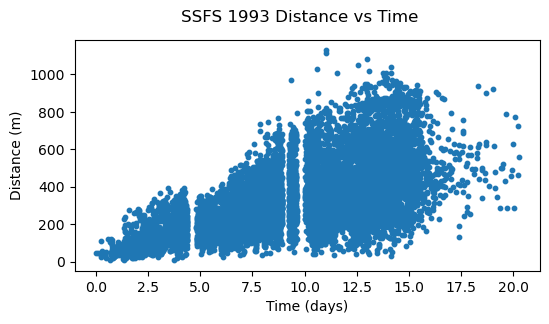

In [9]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("SSFS 1993 Distance vs Time")
ax1.scatter(catalog["Time"],dist,s=10)
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Distance (m)")
plt.plot()

In [7]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [11]:
t1 =[1,1,1]
t2=[]
t2+= t1
print(t2)

[1, 1, 1]


In [8]:
####  Drif corrections
## Vars: MwE2, dstE2, TE2, dcE2, MwEInj, dstInj, TEInj
# M0 = 10.^(1.72*mag0+11.04);
# mag0=(2/3)*log10(M0)-6.1; 

MwE2=np.array(magF)
M0 = np.power(10,1.72*MwE2+11.04)
MwEN = 2/3.0 * np.log10(M0)-6.1

In [9]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]
dtF = np.array(dtF)

# MwEInj, TEInj, dstInj
for z in range(50,len(dtF)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dist[z-50:z].copy())
    subTime=np.array(dtF[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(MwEN[subDstRef[y]])
            rT.append(dtF[subDstRef[y]])
            rstD.append(dist[subDstRef[y]])
        else:
            pM.append(MwEN[subDstRef[y]])
            pT.append(dtF[subDstRef[y]])
            pD.append(dist[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [10]:
def sqrt(x, m):
    return m * np.sqrt((x) * 4)

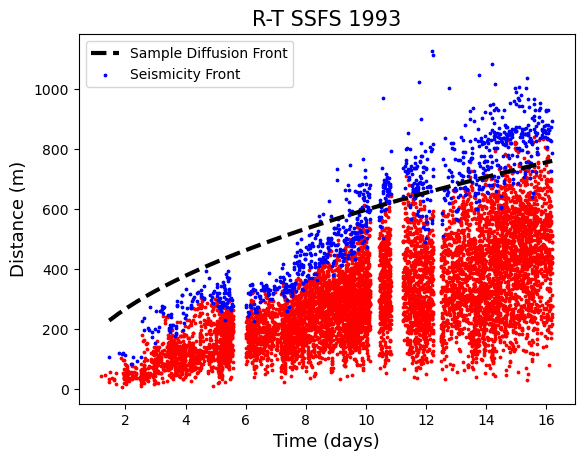

In [12]:
from scipy.optimize import curve_fit

# Reasonable initial guess: m=1.0, c=0.0 or slightly less than min(pTN)
params, _ = curve_fit(sqrt, percT,percD)
m = params
x = np.linspace(min(percT),max(percT))
y = np.sqrt(4*x)*m
plt.plot(x,y,color='k',linewidth=3,linestyle='--',label='Sample Diffusion Front')
plt.scatter(rstT,rstD,c='r',s=3)
plt.scatter(percT,percD,c='b',s=3,label='Seismicity Front')
plt.title("R-T SSFS 1993",size=15)
plt.xlabel("Time (days)",size=13)
plt.ylabel("Distance (m)",size=13)
plt.legend()
plt.show()

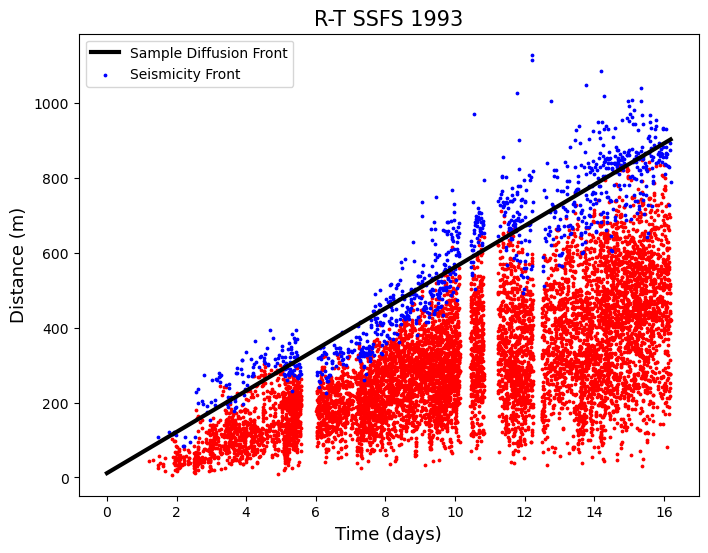

In [13]:
fig, ax1 = plt.subplots(figsize=(8,6))
m,b = np.polyfit(percT,percD,1)
x = np.linspace(0,max(percT))
y = m*x+b
plt.plot(x,y,color='k',linewidth=3,linestyle='-',label='Sample Diffusion Front')
plt.scatter(rstT,rstD,c='r',s=3)
plt.scatter(percT,percD,c='b',s=3,label='Seismicity Front')
plt.title("R-T SSFS 1993",size=15)
plt.xlabel("Time (days)",size=13)
plt.ylabel("Distance (m)",size=13)
plt.legend()
plt.show()

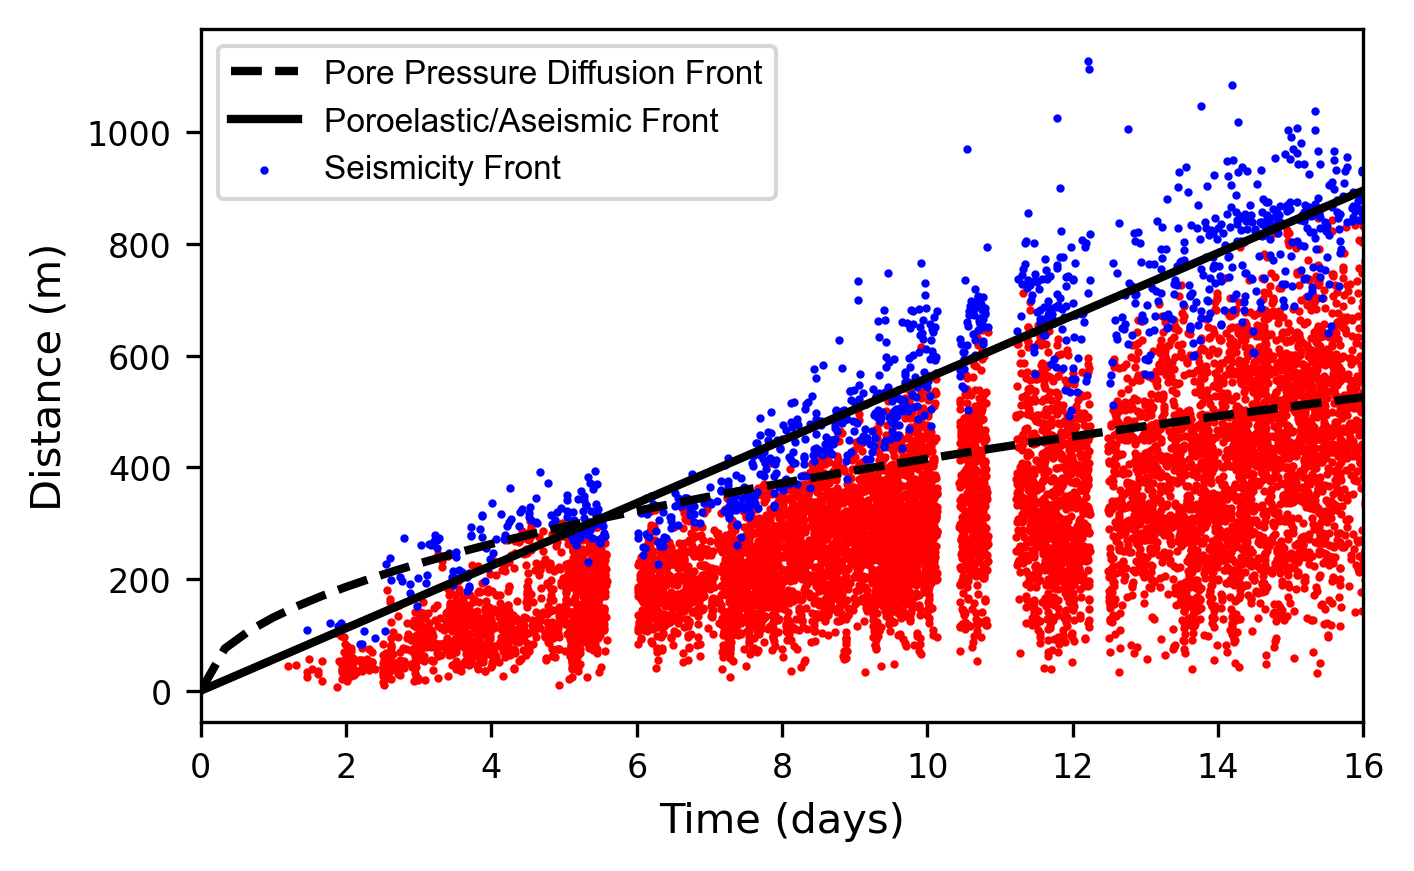

In [14]:
fig, ax1 = plt.subplots(figsize=(5,3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
m = np.dot(percT, percD) / np.dot(percT, percT)
x = np.linspace(0,max(percT))
y = m*x

x1 = np.linspace(0,max(percT))
y1 = np.sqrt(4*0.05*60*60*24*x1)
plt.plot(x1,y1,color='k',linewidth=2,linestyle='--',label='Pore Pressure Diffusion Front')

plt.plot(x,y,color='k',linewidth=2,linestyle='-',label='Poroelastic/Aseismic Front')
plt.scatter(rstT,rstD,c='r',s=1)
plt.scatter(percT,percD,c='b',s=1,label='Seismicity Front')
#plt.title("Schematic Seismicity Fronts Based Off SSFS 1993",size=15)
plt.xlabel("Time (days)",fontsize=10)
plt.ylabel("Distance (m)",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,16)
plt.legend(fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front fig.png",bbox_inches='tight', pad_inches=0.05)

In [16]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [17]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(300,len(percM),30):
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

In [18]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))
quicksort_with_swaps(rstT,rstM,0,len(rstT)-1)
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

9000


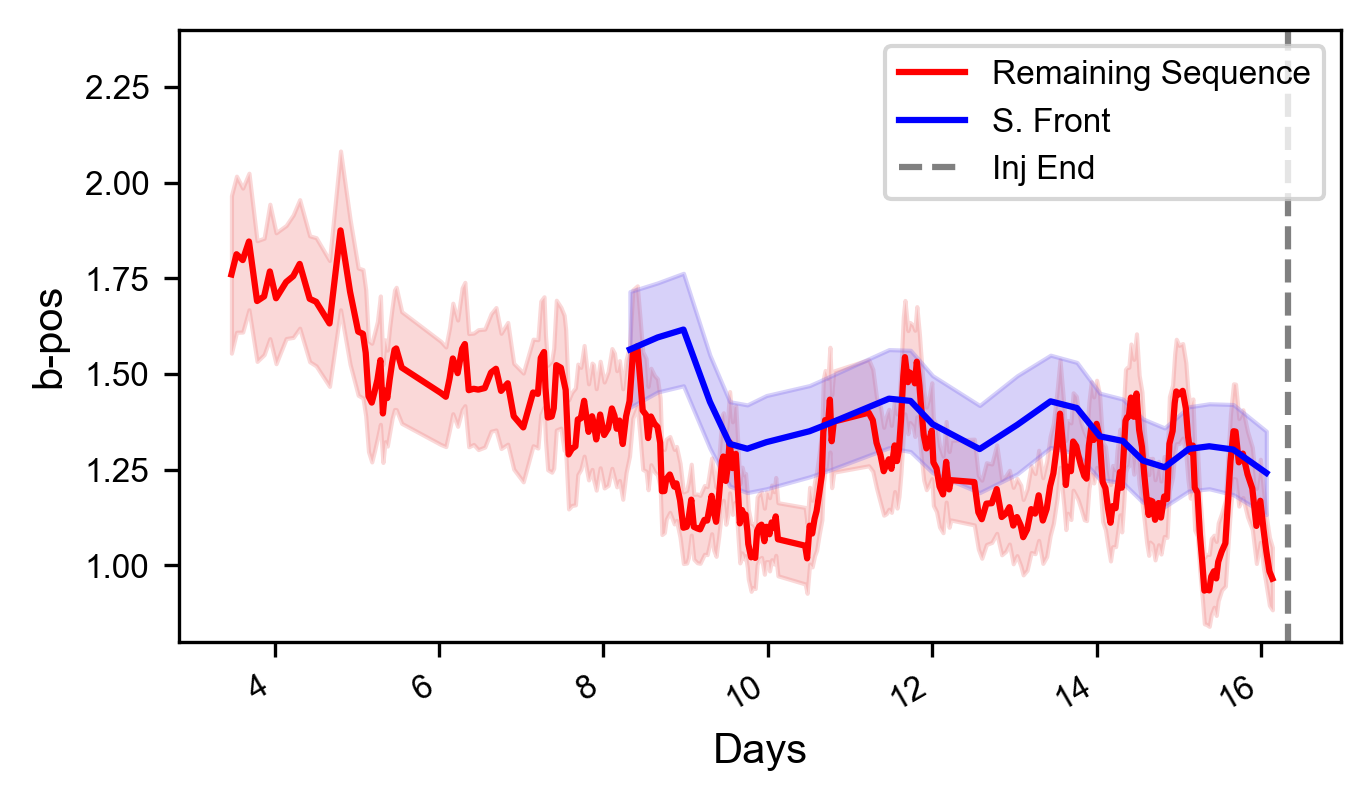

In [21]:
fig, ax1 = plt.subplots(figsize=(5,3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
ax1.plot(rdtr,rbp,color="red",label='Remaining Sequence')
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'lightcoral')
ax1.plot(pdtr,pbp,color="blue", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
#ax1.set_xlim([2,16])
ax1.set_ylim([0.8,2.4])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
fig.autofmt_xdate()
plt.legend(loc = 'upper right',fontsize=8)
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(5,3),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.plot(rdtrNew,rbp,color="red",label='Remaining Sequence')
ax1.fill_between(rdtrNew, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'lightcoral')
ax1.plot(pdtrNew,pbp,color="blue", label='S. Front')
ax1.fill_between(pdtrNew, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(12.95616898148148,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([7,15])
ax1.set_ylim([0.9,2.0])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
fig.autofmt_xdate()
plt.legend(loc = 'upper right',fontsize=8)
plt.show()

In [22]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.2382047212446916 1.22647515112567 1.2894608856705887 0.016736479426097302
1.2727417971070552 1.2287462689573627 1.3199336381550804 0.022689694422805468


1.2382047212446916 1.22647515112567 1.2894608856705887 0.016736479426097302
1.2727417971070552 1.2287462689573627 1.3199336381550804 0.022689694422805468

In [23]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.1801637860097143 1.12681013533715 1.3467707090061756 0.05556291784704107
1.3655581602383735 1.2471697713007857 1.5061811866796222 0.06698603785451172


1.1801637860097143 1.12681013533715 1.3467707090061756 0.05556291784704107
1.3655581602383735 1.2471697713007857 1.5061811866796222 0.06698603785451172

mew


In [ ]:
# before: 1.3039643704810813 1.2912982599047456 1.3628510878137745, 1.264422241826543 1.21705727812598 1.4785182115059063
"""
90% bv
rst 1.3039643704810813 1.291863928135489 1.3632326560890093 0.017941833195242195
perc 1.2644222418265438 1.2177006640958563 1.4732808496761833 0.06951864671727549
bp
rst 1.4704496618942122 1.418911945389196 1.5227017881797331 0.026158504436900577
perc 1.5635647211206787 1.42923353118091 1.7192874213666247 0.07550346656453848

80% bv
rst 1.3096220785625214 1.294274856638135 1.3775729081206578 0.02051358006211117
perc 1.2685991521670144 1.2194895229175675 1.3551233867886179 0.035132331277061654
bp
rst 1.4725811903218917 1.4194013638170513 1.5318854898250773 0.02781818719631678
perc 1.524264755426455 1.4184771932101496 1.6293811698830436 0.052606944268569704
"""
#Newww
"""
90% bv
rst 1.4100217821608945 1.396475731875928 1.4892929911819768 0.02227940901597167
perc 1.364401403544435 1.3126692052523379 1.6196583978442483 0.08445822562194669
bp
rst 1.4774006928044416 1.42648387585492 1.5323314115519195 0.02701499004999545
perc 1.5756212680189516 1.4403095546884914 1.7433966661882865 0.07953529762438337

80% bv
rst 1.3096220785625214 1.294274856638135 1.3775729081206578 0.02051358006211117
perc 1.2685991521670144 1.2194895229175675 1.3551233867886179 0.035132331277061654
bp
rst 1.4725811903218917 1.4194013638170513 1.5318854898250773 0.02781818719631678
perc 1.524264755426455 1.4184771932101496 1.6293811698830436 0.052606944268569704
"""

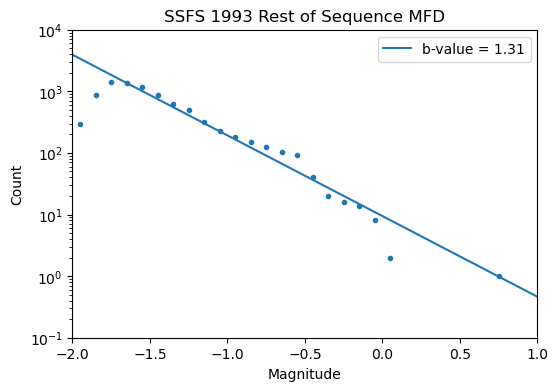

In [51]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS 1993 Rest of Sequence MFD')
plt.show()

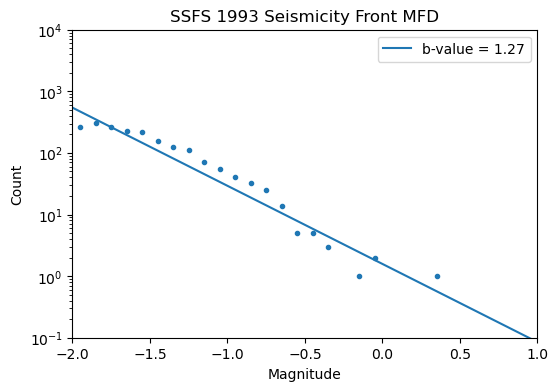

In [53]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('SSFS 1993 Seismicity Front MFD')
plt.show()